# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [19]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [20]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)   
cities = pd.DataFrame(cities)   
cities.rename(columns={0:"City"}, inplace=True) 
cities

,City
0,mananara
1,castro
2,albany
3,huarmey
4,chokurdakh
...,...
608,dzhusaly
609,zlobin
610,severodvinsk
611,puerto carreno


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [21]:
cities["lat"] = ""
cities["lon"] = ""
cities["temp"] = ""
cities["temp_max"] = ""
cities["humidity"] = ""
cities["cloudiness"] = ""
cities["wind_speed"] = ""
cities["country"] = ""

city_counter = 0
api_counter = 0
for index, row in cities.iterrows():
    if api_counter <= 60:
        cityname = row["City"]
        url = f"http://api.openweathermap.org/data/2.5/weather?q={cityname}&units=imperial&appid={weather_api_key}"
        try:
            response = requests.get(url).json()
            cities.loc[index, "City"] = response["name"]
            cities.loc[index, "lat"] = response["coord"]["lat"]
            cities.loc[index, "lon"] = response["coord"]["lon"]
            cities.loc[index, "temp"] = response["main"]["temp"]
            cities.loc[index, "temp_max"] = response["main"]["temp_max"]
            cities.loc[index, "humidity"] = response["main"]["humidity"]
            cities.loc[index, "cloudiness"] = response["clouds"]["all"]
            cities.loc[index, "wind_speed"] = response["wind"]["speed"]
            cities.loc[index,"country"] = response["sys"]["country"]
            city_counter = city_counter + 1
            api_counter = api_counter + 1
            print(city_counter, response["name"])

        except:
            print("not found")
            api_counter = api_counter + 1
    else:
        time.sleep(60)
        api_counter =0

cities.replace("", np.nan, inplace=True)
cities.dropna(how = "any", subset=["lat"], inplace= True)
cities

1 Mananara
2 Castro
3 Albany
4 Huarmey
5 Chokurdakh
6 Yellowknife
not found
not found
not found
7 Bereket
8 Campo Maior
9 Mataura
10 Sukhobezvodnoye
11 Kieta
12 Rodrigues Alves
13 Kavaratti
14 Port Elizabeth
15 Hobart
16 Santa Cruz de la Sierra
not found
not found
17 Port Macquarie
18 Port Pirie
19 Faanui
20 Rajshahi
21 Kapaa
22 Tura
23 Bredasdorp
24 Punta Arenas
25 Kampong Cham
26 Guerrero Negro
27 Saint Paul Harbor
28 Busselton
29 Mahébourg
30 Gimli
31 Tuktoyaktuk
32 Fortuna
33 Khatanga
not found
34 Maisach
35 Hamilton
36 Puerto Ayora
not found
37 Departamento de Maldonado
38 Erenhot
39 Bethel
40 Key West
41 Nioro
42 Te Anau
43 Pacifica
44 Cidreira
not found
not found
not found
45 Valparaíso
46 Chippewa Falls
47 Vaini
48 Cape Town
49 Moratuwa
50 Bengkulu
51 Narganá
52 Lagoa
53 Sapa
54 Kuala Terengganu
55 Mamlyutka
56 Carnarvon
57 Ugoofaaru
58 Broome
59 Dunedin
60 George Town
61 Rikitea
not found
62 Ancud
63 Qaanaaq
64 Airai
65 Butaritari
66 Härnösand
67 Ushuaia
68 Vila
69 Kruisfontei

,City,lat,lon,temp,temp_max,humidity,cloudiness,wind_speed,country
0,Mananara,-16.17,49.77,79.72,79.72,83.0,98.0,5.84,MG
1,Castro,-24.79,-50.01,66.36,66.36,54.0,81.0,5.86,BR
2,Albany,42.60,-73.97,36.90,39.99,69.0,75.0,0.81,US
3,Huarmey,-10.07,-78.15,73.45,73.45,77.0,99.0,4.07,PE
4,Chokurdakh,70.63,147.92,-0.44,-0.44,92.0,66.0,2.75,RU
...,...,...,...,...,...,...,...,...,...
606,Macia,-25.03,33.10,76.71,76.71,60.0,17.0,9.64,MZ
607,Brae,60.40,-1.35,37.99,39.20,55.0,60.0,24.16,GB
609,Zlobin,45.29,14.65,62.46,66.20,29.0,39.0,8.05,HR
610,Severodvinsk,64.56,39.83,42.80,42.80,56.0,40.0,8.95,RU


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
cities.to_csv("cities.csv")
cities


,City,lat,lon,temp,temp_max,humidity,cloudiness,wind_speed,country
0,Mananara,-16.17,49.77,79.72,79.72,83.0,98.0,5.84,MG
1,Castro,-24.79,-50.01,66.36,66.36,54.0,81.0,5.86,BR
2,Albany,42.60,-73.97,36.90,39.99,69.0,75.0,0.81,US
3,Huarmey,-10.07,-78.15,73.45,73.45,77.0,99.0,4.07,PE
4,Chokurdakh,70.63,147.92,-0.44,-0.44,92.0,66.0,2.75,RU
...,...,...,...,...,...,...,...,...,...
606,Macia,-25.03,33.10,76.71,76.71,60.0,17.0,9.64,MZ
607,Brae,60.40,-1.35,37.99,39.20,55.0,60.0,24.16,GB
609,Zlobin,45.29,14.65,62.46,66.20,29.0,39.0,8.05,HR
610,Severodvinsk,64.56,39.83,42.80,42.80,56.0,40.0,8.95,RU


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Temperatures are highest around the equator (latitude 0). In this dataset it appears that latitudes above the equator (the positive latitudes) are colder than the latitudes below the equator
------------------------------------------


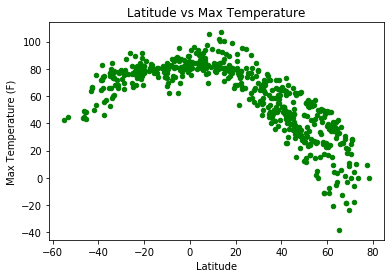

In [36]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["temp_max"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Max Temperature")
plt.savefig("Lat_v_Temp.png")

print("Temperatures are highest around the equator (latitude 0). In this dataset it appears that latitudes above the equator (the positive latitudes) are colder than the latitudes below the equator\n------------------------------------------")

#### Latitude vs. Humidity Plot

There does not appear to be any correlation between percentage of humidity and latitude. 
------------------------------------------


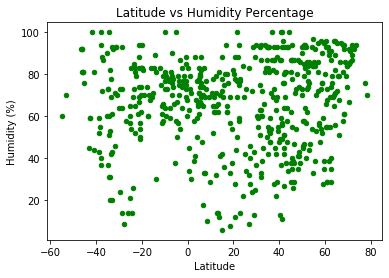

In [37]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["humidity"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity Percentage")
plt.savefig("Lat_v_Humidity.png")
print("There does not appear to be any correlation between percentage of humidity and latitude. \n------------------------------------------")

#### Latitude vs. Cloudiness Plot

There does not appear to be any coorelation between percentage of cloudiness and latitude 
------------------------------------------


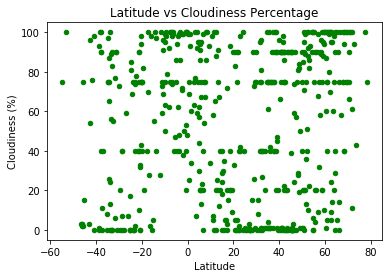

In [38]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["cloudiness"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness Percentage")
plt.savefig("Lat_v_Cloud.png")
print("There does not appear to be any coorelation between percentage of cloudiness and latitude \n------------------------------------------")

#### Latitude vs. Wind Speed Plot

There does not appear to be any correaltion between latitude and wind speed. However there are what appear to be some outliers in the 60-80 degree latitude range. 
------------------------------------------


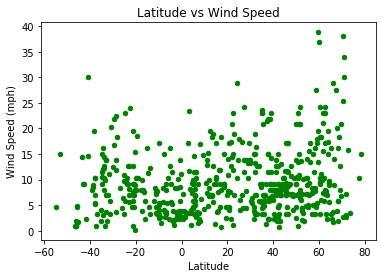

In [39]:
cities.plot(kind = "scatter" , x = ["lat"], y = ["wind_speed"], color = "green")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed")
plt.savefig("Lat_v_Wind.png")
print("There does not appear to be any correaltion between latitude and wind speed. However there are what appear to be some outliers in the 60-80 degree latitude range. \n------------------------------------------")

## Linear Regression

In [27]:
# Create Northern and Southern Hemisphere DataFrames
NH = cities.loc[cities["lat"] >= 0]
SH = cities.loc[cities["lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8674153055737759
There is a strong correlatino between latitude and temperature in the Northen Hemisphere. The higher the latitude the lowr the temperature. 
------------------------------------------


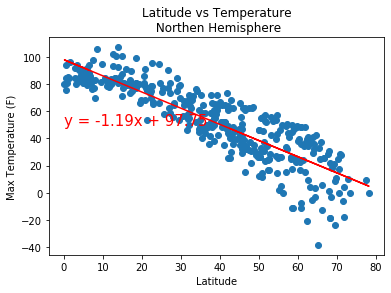

In [40]:
x_values = NH["lat"]
y_values = NH["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Temperature\n Northen Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a strong correlation between latitude and temperature in the Northen Hemisphere. The higher the latitude the lower the temperature. \n------------------------------------------")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6636141464886098
There is a moderate correlatino between latitude and temperature in the Southern Hemisphere. The lower the latitude the lower the temperature. 
------------------------------------------


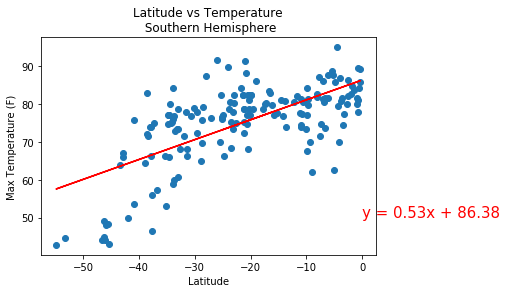

In [41]:
x_values = SH["lat"]
y_values = SH["temp_max"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Latitude vs Temperature\n Southern Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a moderate correlation between latitude and temperature in the Southern Hemisphere. The lower the latitude the lower the temperature. \n------------------------------------------")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.21414559815593315
There is a very weak correlatino between latitude and percentage of humidity in the Northen Hemisphere.  
------------------------------------------


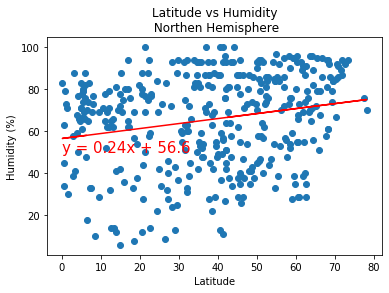

In [42]:
x_values = NH["lat"]
y_values = NH["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity\n Northen Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very weak correlation between latitude and percentage of humidity in the Northen Hemisphere.  \n------------------------------------------")


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12758777060070403
There is a very very weak correlatino between latitude and percentage of humidity in the Southern Hemisphere.  
------------------------------------------


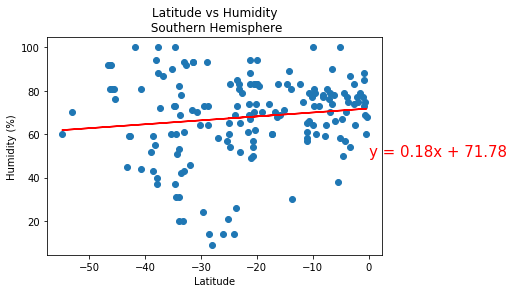

In [43]:
x_values = SH["lat"]
y_values = SH["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Latitude vs Humidity\n Southern Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very very weak correlation between latitude and percentage of humidity in the Southern Hemisphere.  \n------------------------------------------")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1603059825800287
There is a very weak correlatino between latitude and percentage of cloudiness in the Northen Hemisphere.  
------------------------------------------


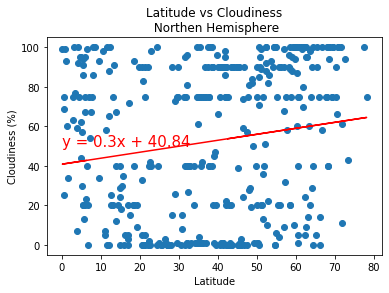

In [44]:
x_values = NH["lat"]
y_values = NH["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness\n Northen Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very weak positive correlation between latitude and percentage of cloudiness in the Northen Hemisphere.  \n------------------------------------------")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.33928683260547343
There is a very weak correlation between latitude and percentage of cloudiness in the Southen Hemisphere.  This correlation is stronger than the correlation between latitude and cloudiness in the Northern Hemisphere. 
------------------------------------------


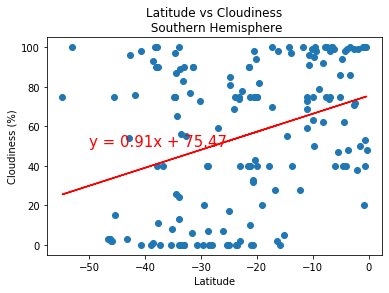

In [45]:
x_values = SH["lat"]
y_values = SH["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Latitude vs Cloudiness\n Southern Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very weak positive correlation between latitude and percentage of cloudiness in the Southen Hemisphere.  This correlation is stronger than the correlation between latitude and cloudiness in the Northern Hemisphere. \n------------------------------------------")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.19378292079836387
There is a very weak correlation between latitude and wind speed in the Northen Hemisphere.  
------------------------------------------


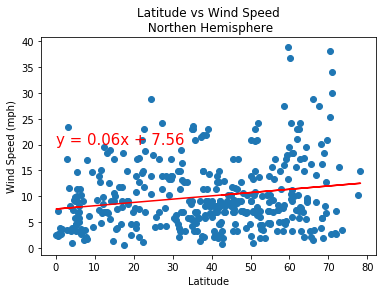

In [46]:
x_values = NH["lat"]
y_values = NH["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed\n Northen Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very weak positive correlation between latitude and wind speed in the Northen Hemisphere.  \n------------------------------------------")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.18035948906750526


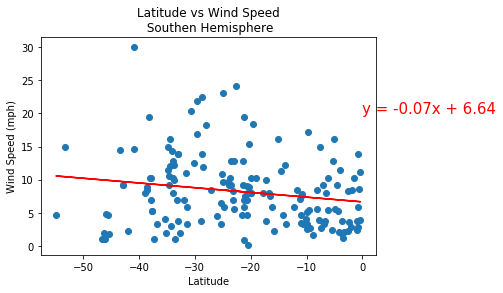

In [35]:
x_values = SH["lat"]
y_values = SH["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Latitude vs Wind Speed\n Southen Hemisphere")
print(f"The r-squared is: {rvalue}")

print("There is a very weak negative correlation between latitude and wind speed in the Northen Hemisphere.  \n------------------------------------------")